In [23]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [24]:
# Loading the final dataframe
#data=pd.read_csv("/Users/gopalika14/Desktop/final_data.csv")
#data = data.drop(['OBJECTID'], axis=1)
#data = data.drop(['Field1'], axis=1)
#data = data[data['County'].notna()]
#data = data.rename(columns={'FIPS_CODE_1': 'FIPS_NAME'})
#print(data.columns)
#data

In [25]:
# Loading the final dataframe
data= pd.read_csv("/Users/gopalika14/Desktop/CA_DATA.csv")
print(data.columns)
data

Index(['ID', 'LATITUDE', 'LONGITUDE', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'FIRE_CODE', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'FIPS_CODE',
       'FIPS_NAME', 'County', 'DATE', 'AWND', 'DX90', 'EMXP', 'EMXT', 'PRCP',
       'TAVG', 'TMAX', 'TMIN', 'NEAR_FID', 'NEAR_DIST'],
      dtype='object')


,ID,LATITUDE,LONGITUDE,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_CODE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,...,AWND,DX90,EMXP,EMXT,PRCP,TAVG,TMAX,TMIN,NEAR_FID,NEAR_DIST
0,128764,38.900278,-120.002500,FED,FS-FIRESTAT,8525,WAGON,2000,2000/07/03 00:00:00+00,185,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,1759,1702.002813
1,128765,38.893889,-120.032222,FED,FS-FIRESTAT,8527,FALLEN,2000,2000/07/07 00:00:00+00,189,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,1450,844.446657
2,128766,38.900000,-119.983333,FED,FS-FIRESTAT,8514,HOSPITAL,2000,2000/05/02 00:00:00+00,123,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,99,1141.746990
3,128767,39.016944,-120.125000,FED,FS-FIRESTAT,8518,SIERRA,2000,2000/06/15 00:00:00+00,167,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,172,2029.504605
4,128768,38.851389,-119.968333,FED,FS-FIRESTAT,8528,ONEIDAS III,2000,2000/07/03 00:00:00+00,185,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,1868,4435.980601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53123,1871683,34.111512,-117.234936,NONFED,ST-NASF,NaN,LANKERSHIM AV / MCKINLEY,2015,2015/11/23 00:00:00+00,327,...,8.1,176.0,1.00,118.0,4.00,76.8,89.0,64.7,1247,493.401885
53124,1871684,34.500000,-118.633333,NONFED,ST-NASF,NaN,NaN,2015,2015/11/01 00:00:00+00,305,...,9.8,105.0,0.96,106.0,5.53,63.7,77.7,49.7,390,798.435161
53125,1871685,33.551944,-117.097584,NONFED,ST-NASF,NaN,MURRIETA HOT SPRINGS RD /,2015,2015/11/18 00:00:00+00,322,...,6.5,184.0,0.52,118.0,2.09,76.6,89.4,63.8,1067,5277.486426
53126,1871686,37.100631,-121.013584,NONFED,ST-NASF,NaN,HENRY,2015,2015/10/23 00:00:00+00,296,...,6.0,105.0,1.04,106.0,6.81,63.6,77.4,49.7,1870,3459.238393


# PRE-LIM ANALYSIS

In [5]:
data.dtypes

ID                      int64
LATITUDE              float64
LONGITUDE             float64
SOURCE_SYSTEM_TYPE     object
SOURCE_SYSTEM          object
FIRE_CODE              object
FIRE_NAME              object
FIRE_YEAR               int64
DISCOVERY_DATE         object
DISCOVERY_DOY           int64
DISCOVERY_TIME        float64
STAT_CAUSE_CODE         int64
STAT_CAUSE_DESCR       object
CONT_DATE              object
CONT_DOY              float64
CONT_TIME             float64
FIRE_SIZE             float64
FIRE_SIZE_CLASS        object
OWNER_CODE              int64
OWNER_DESCR            object
STATE                  object
FIPS_CODE               int64
FIPS_NAME              object
County                 object
DATE                    int64
AWND                  float64
DX90                  float64
EMXP                  float64
EMXT                  float64
PRCP                  float64
TAVG                  float64
TMAX                  float64
TMIN                  float64
NEAR_FID  

In [6]:
import seaborn as sns
df1 = data[(data['County'] =='Colusa')]
# get a look at the data with head function
df1.head(n=3)

,ID,LATITUDE,LONGITUDE,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_CODE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,...,AWND,DX90,EMXP,EMXT,PRCP,TAVG,TMAX,TMIN,NEAR_FID,NEAR_DIST
200,318137,39.073200,-122.511100,FED,DOI-WFMI,Z382,LNU INDIAN,2000,2000/06/17 00:00:00+00,169,...,NaN,77.0,1.18,105.0,20.68,57.7,72.7,42.7,1742,7437.585636
433,318227,38.958961,-122.345131,FED,DOI-WFMI,D5GJ,HWY 16,2000,2000/07/20 00:00:00+00,202,...,NaN,77.0,1.18,105.0,20.68,57.7,72.7,42.7,226,5977.761784
471,318299,38.931031,-122.327950,FED,DOI-WFMI,D5GJ,16,2000,2000/08/17 00:00:00+00,230,...,NaN,77.0,1.18,105.0,20.68,57.7,72.7,42.7,226,9339.014752


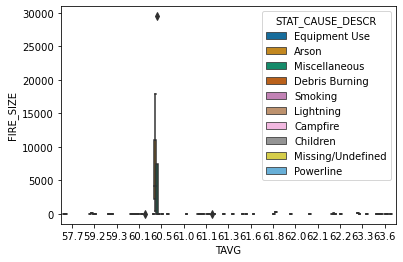

In [7]:
sns.boxplot(x='TAVG', y='FIRE_SIZE', data=df1, palette="colorblind",hue='STAT_CAUSE_DESCR')

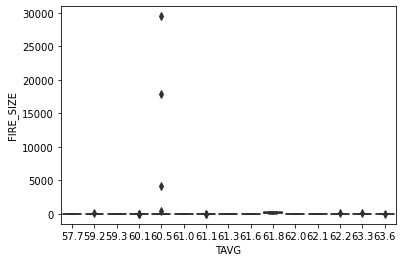

In [8]:
sns.boxplot(x='TAVG', y='FIRE_SIZE', data=df1, palette="colorblind")

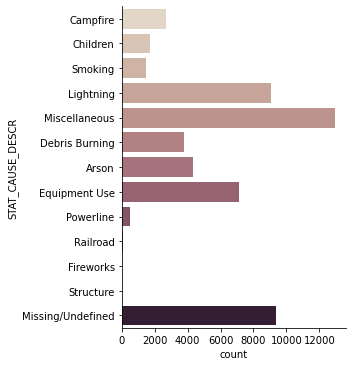

In [26]:
sns.catplot(y="STAT_CAUSE_DESCR", kind="count", palette="ch:.25",orient="h", data=data)

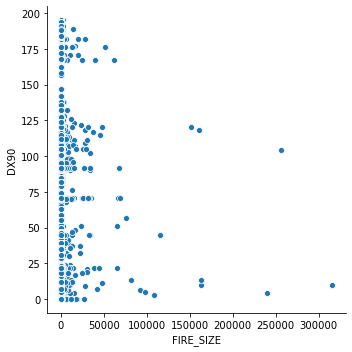

In [10]:
sns.relplot(x="FIRE_SIZE", y="DX90",data=data)

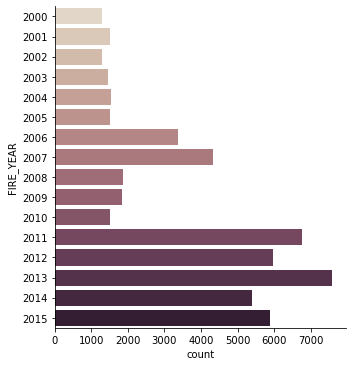

In [27]:
sns.catplot(y="FIRE_YEAR", kind="count", palette="ch:.25",orient="h", data=data)

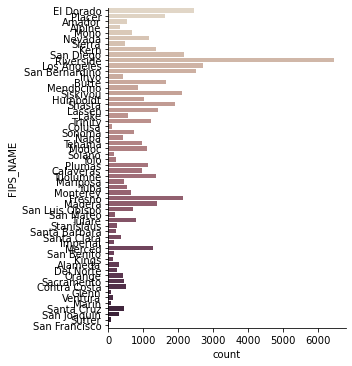

In [28]:
sns.catplot(y="FIPS_NAME", kind="count", palette="ch:.25",orient="h", data=data)

In [30]:
data['DATE'] = pd.to_datetime(data['DISCOVERY_DATE'])
data['MONTH'] = data['DATE'].dt.month

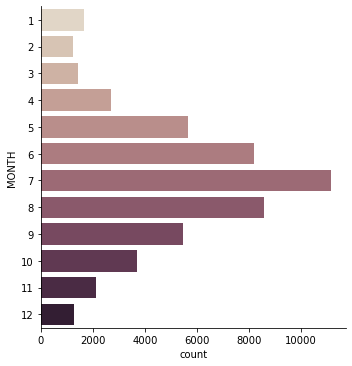

In [31]:
sns.catplot(y="MONTH", kind="count", palette="ch:.25",orient="h", data=data)

In [33]:
data['DAY_OF_WEEK'] = data['DATE'].dt.dayofweek
data['BURN_TIME'] = (pd.to_datetime(data['CONT_DATE']) - data['DATE']).astype(int)+1

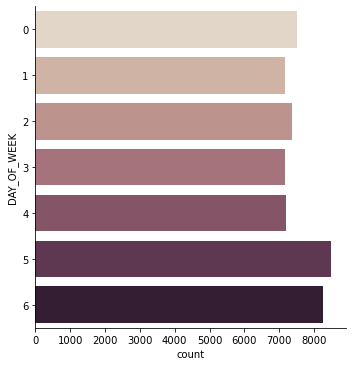

In [39]:
ax=sns.catplot(y="DAY_OF_WEEK", kind="count", palette="ch:.25",orient="h", data=data)


In [37]:
data.corr()

,ID,LATITUDE,LONGITUDE,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,CONT_DOY,CONT_TIME,FIRE_SIZE,...,EMXT,PRCP,TAVG,TMAX,TMIN,NEAR_FID,NEAR_DIST,MONTH,DAY_OF_WEEK,BURN_TIME
ID,1.000000,-0.039567,-0.081932,0.872409,-0.052598,0.017128,0.303956,-0.039106,-0.024704,-0.016345,...,-0.004273,-0.146543,0.139138,0.113404,0.163541,-0.039401,-0.169245,-0.047911,-0.018262,-0.392927
LATITUDE,-0.039567,1.000000,-0.871806,0.002557,0.070980,0.005164,-0.214347,0.070511,0.038632,0.003081,...,-0.530095,0.604996,-0.722492,-0.681002,-0.722864,0.085914,0.147820,0.070720,-0.008307,0.115254
LONGITUDE,-0.081932,-0.871806,1.000000,-0.093018,-0.053875,0.000856,0.057081,-0.060333,-0.019042,-0.005565,...,0.529509,-0.571935,0.622575,0.621944,0.589921,-0.050305,0.000229,-0.054289,0.008361,0.022297
FIRE_YEAR,0.872409,0.002557,-0.093018,1.000000,-0.054240,0.000849,0.216934,-0.037086,-0.023455,-0.006287,...,-0.000396,-0.157756,0.114312,0.097901,0.130908,-0.008437,-0.073959,-0.050824,-0.001689,-0.271841
DISCOVERY_DOY,-0.052598,0.070980,-0.053875,-0.054240,1.000000,-0.048215,-0.053241,0.994561,-0.029938,0.011222,...,-0.073528,0.062012,-0.088944,-0.089530,-0.083024,0.004734,0.038512,0.992232,-0.006804,0.047951
DISCOVERY_TIME,0.017128,0.005164,0.000856,0.000849,-0.048215,1.000000,0.010155,-0.045082,0.661344,0.001911,...,0.016234,-0.019269,0.005700,0.012991,-0.003303,0.001193,0.002313,-0.048232,-0.011094,-0.026345
STAT_CAUSE_CODE,0.303956,-0.214347,0.057081,0.216934,-0.053241,0.010155,1.000000,-0.054239,-0.051116,-0.016259,...,0.095763,-0.129196,0.217737,0.177017,0.247833,-0.083015,-0.272703,-0.051429,-0.002280,-0.284833
CONT_DOY,-0.039106,0.070511,-0.060333,-0.037086,0.994561,-0.045082,-0.054239,1.000000,-0.030579,0.035429,...,-0.069651,0.058334,-0.093194,-0.091139,-0.090488,0.000871,0.045640,0.985929,-0.003980,0.092186
CONT_TIME,-0.024704,0.038632,-0.019042,-0.023455,-0.029938,0.661344,-0.051116,-0.030579,1.000000,0.011917,...,-0.009148,0.015396,-0.032391,-0.023332,-0.040397,0.012332,0.039429,-0.029567,-0.000438,-0.011294
FIRE_SIZE,-0.016345,0.003081,-0.005565,-0.006287,0.011222,0.001911,-0.016259,0.035429,0.011917,1.000000,...,-0.002183,0.000300,-0.006949,-0.005911,-0.007659,0.011641,0.022490,0.010175,0.008656,0.016575


In [11]:
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr
data['TAVG'] = np.nan_to_num(data['TAVG'])
data['FIRE_SIZE'] = np.nan_to_num(data['FIRE_SIZE'])
print(cov(data['TAVG'],data['FIRE_SIZE']))
print(spearmanr(data['TAVG'], data['FIRE_SIZE']))
print(pearsonr(data['TAVG'],data['FIRE_SIZE']))

[[ 2.41553770e+02 -6.72357749e+02]
 [-6.72357749e+02  9.82465135e+06]]
SpearmanrResult(correlation=0.0164317217998174, pvalue=0.00015211054345617845)
(-0.01380177459896215, 0.0014660643357098215)


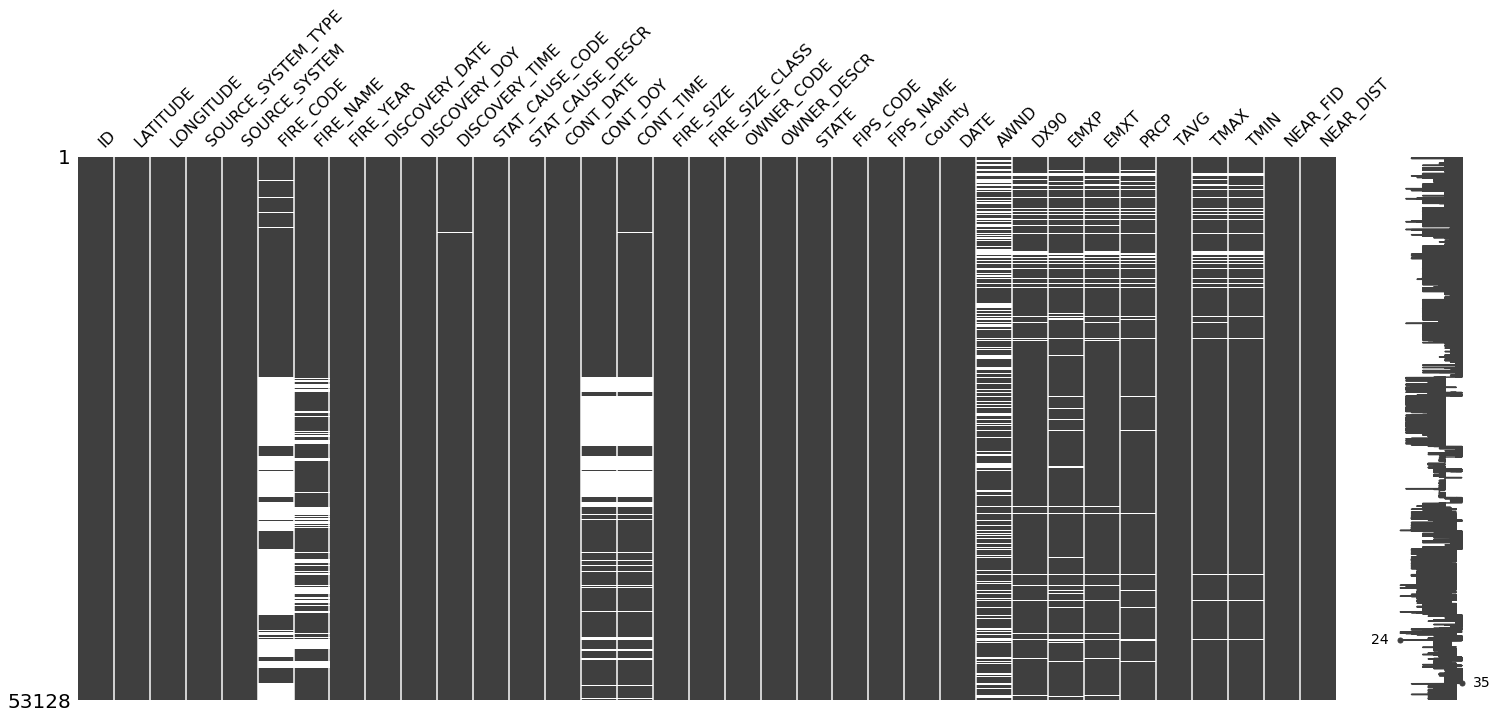

In [12]:
msno.matrix(data)

In [13]:
data.isnull().sum()

ID                        0
LATITUDE                  0
LONGITUDE                 0
SOURCE_SYSTEM_TYPE        0
SOURCE_SYSTEM             0
FIRE_CODE             24978
FIRE_NAME              8604
FIRE_YEAR                 0
DISCOVERY_DATE            0
DISCOVERY_DOY             0
DISCOVERY_TIME          440
STAT_CAUSE_CODE           0
STAT_CAUSE_DESCR          0
CONT_DATE                 0
CONT_DOY              13332
CONT_TIME             13796
FIRE_SIZE                 0
FIRE_SIZE_CLASS           0
OWNER_CODE                0
OWNER_DESCR               0
STATE                     0
FIPS_CODE                 0
FIPS_NAME                 0
County                    0
DATE                      0
AWND                  14636
DX90                   3348
EMXP                   4863
EMXT                   3348
PRCP                   3198
TAVG                      0
TMAX                   2610
TMIN                   2382
NEAR_FID                  0
NEAR_DIST                 0
dtype: int64

In [14]:
print(cov(data['TAVG'],data['FIRE_SIZE']))
print(spearmanr(data['TAVG'], data['FIRE_SIZE']))
print(pearsonr(data['TAVG'],data['FIRE_SIZE']))

[[ 2.41553770e+02 -6.72357749e+02]
 [-6.72357749e+02  9.82465135e+06]]
SpearmanrResult(correlation=0.0164317217998174, pvalue=0.00015211054345617845)
(-0.01380177459896215, 0.0014660643357098215)


In [15]:
#msno.heatmap(data)
data.corr()

,ID,LATITUDE,LONGITUDE,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,CONT_DOY,CONT_TIME,FIRE_SIZE,...,AWND,DX90,EMXP,EMXT,PRCP,TAVG,TMAX,TMIN,NEAR_FID,NEAR_DIST
ID,1.000000,-0.039567,-0.081932,0.872409,-0.052598,0.017128,0.303956,-0.039106,-0.024704,-0.016345,...,0.038452,0.037045,-0.061177,-0.004273,-0.146543,0.272830,0.113404,0.163541,-0.039401,-0.169245
LATITUDE,-0.039567,1.000000,-0.871806,0.002557,0.070980,0.005164,-0.214347,0.070511,0.038632,0.003081,...,-0.445434,-0.566885,0.476405,-0.530095,0.604996,-0.271097,-0.681002,-0.722864,0.085914,0.147820
LONGITUDE,-0.081932,-0.871806,1.000000,-0.093018,-0.053875,0.000856,0.057081,-0.060333,-0.019042,-0.005565,...,0.349807,0.607842,-0.441103,0.529509,-0.571935,0.210096,0.621944,0.589921,-0.050305,0.000229
FIRE_YEAR,0.872409,0.002557,-0.093018,1.000000,-0.054240,0.000849,0.216934,-0.037086,-0.023455,-0.006287,...,0.011583,0.031152,-0.032500,-0.000396,-0.157756,0.255410,0.097901,0.130908,-0.008437,-0.073959
DISCOVERY_DOY,-0.052598,0.070980,-0.053875,-0.054240,1.000000,-0.048215,-0.053241,0.994561,-0.029938,0.011222,...,-0.041546,-0.075758,0.030724,-0.073528,0.062012,-0.054453,-0.089530,-0.083024,0.004734,0.038512
DISCOVERY_TIME,0.017128,0.005164,0.000856,0.000849,-0.048215,1.000000,0.010155,-0.045082,0.661344,0.001911,...,0.005991,0.013944,-0.014291,0.016234,-0.019269,0.010080,0.012991,-0.003303,0.001193,0.002313
STAT_CAUSE_CODE,0.303956,-0.214347,0.057081,0.216934,-0.053241,0.010155,1.000000,-0.054239,-0.051116,-0.016259,...,0.103487,0.118563,-0.114594,0.095763,-0.129196,0.166881,0.177017,0.247833,-0.083015,-0.272703
CONT_DOY,-0.039106,0.070511,-0.060333,-0.037086,0.994561,-0.045082,-0.054239,1.000000,-0.030579,0.035429,...,-0.043077,-0.084689,0.030669,-0.069651,0.058334,-0.052494,-0.091139,-0.090488,0.000871,0.045640
CONT_TIME,-0.024704,0.038632,-0.019042,-0.023455,-0.029938,0.661344,-0.051116,-0.030579,1.000000,0.011917,...,-0.009576,-0.021812,0.013958,-0.009148,0.015396,-0.009006,-0.023332,-0.040397,0.012332,0.039429
FIRE_SIZE,-0.016345,0.003081,-0.005565,-0.006287,0.011222,0.001911,-0.016259,0.035429,0.011917,1.000000,...,0.001283,-0.009067,0.005004,-0.002183,0.000300,-0.013802,-0.005911,-0.007659,0.011641,0.022490


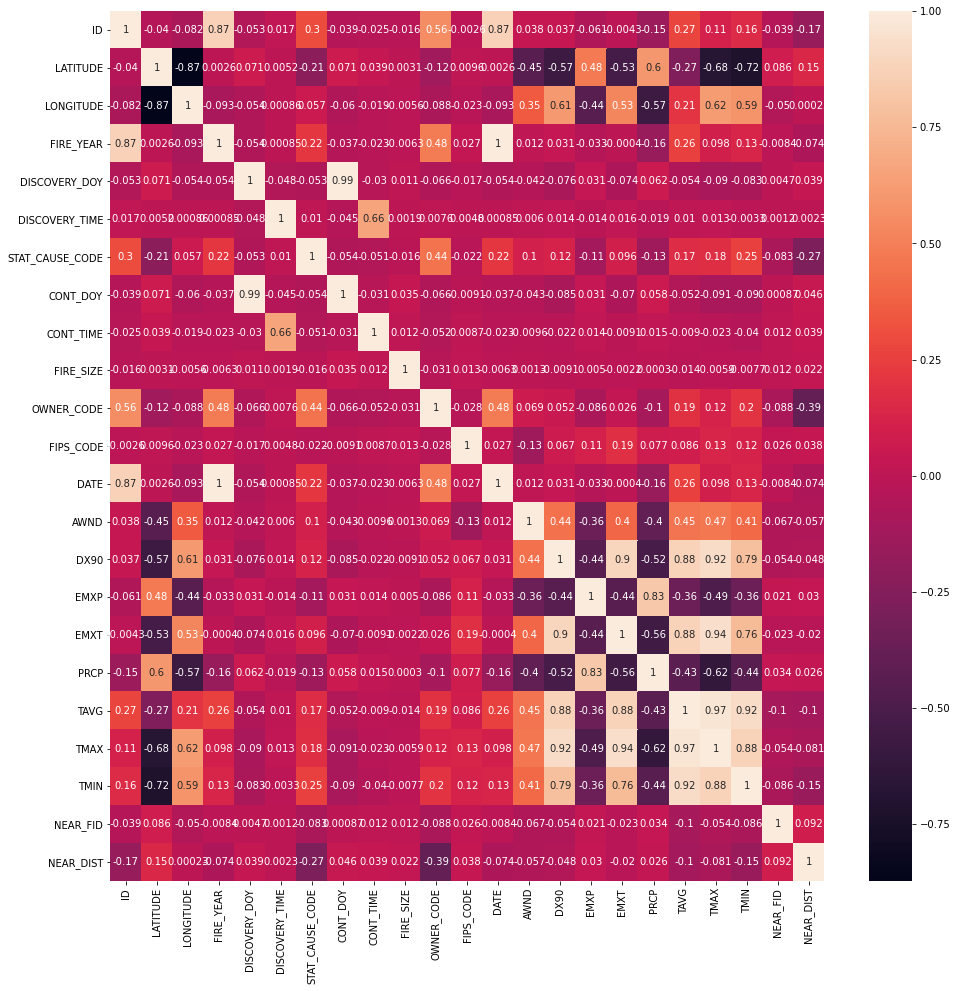

In [16]:
df = pd.DataFrame(data,columns=['TAVG','PRCP','FIRE_SIZE'])
corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(16,16))  
#print (corrMatrix)
sns.heatmap(corrMatrix,ax=ax, annot=True)

# MODELLING

In [3]:
# Loading the final dataframe
data= pd.read_csv("/Users/gopalika14/Desktop/CA_DATA.csv")
data.rename(columns = {'DATE':'YEAR'}, inplace = True) 
print(data.columns)
data

Index(['ID', 'LATITUDE', 'LONGITUDE', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'FIRE_CODE', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'FIPS_CODE',
       'FIPS_NAME', 'County', 'YEAR', 'AWND', 'DX90', 'EMXP', 'EMXT', 'PRCP',
       'TAVG', 'TMAX', 'TMIN', 'NEAR_FID', 'NEAR_DIST'],
      dtype='object')


,ID,LATITUDE,LONGITUDE,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_CODE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,...,AWND,DX90,EMXP,EMXT,PRCP,TAVG,TMAX,TMIN,NEAR_FID,NEAR_DIST
0,128764,38.900278,-120.002500,FED,FS-FIRESTAT,8525,WAGON,2000,2000/07/03 00:00:00+00,185,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,1759,1702.002813
1,128765,38.893889,-120.032222,FED,FS-FIRESTAT,8527,FALLEN,2000,2000/07/07 00:00:00+00,189,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,1450,844.446657
2,128766,38.900000,-119.983333,FED,FS-FIRESTAT,8514,HOSPITAL,2000,2000/05/02 00:00:00+00,123,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,99,1141.746990
3,128767,39.016944,-120.125000,FED,FS-FIRESTAT,8518,SIERRA,2000,2000/06/15 00:00:00+00,167,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,172,2029.504605
4,128768,38.851389,-119.968333,FED,FS-FIRESTAT,8528,ONEIDAS III,2000,2000/07/03 00:00:00+00,185,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,1868,4435.980601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53123,1871683,34.111512,-117.234936,NONFED,ST-NASF,NaN,LANKERSHIM AV / MCKINLEY,2015,2015/11/23 00:00:00+00,327,...,8.1,176.0,1.00,118.0,4.00,76.8,89.0,64.7,1247,493.401885
53124,1871684,34.500000,-118.633333,NONFED,ST-NASF,NaN,NaN,2015,2015/11/01 00:00:00+00,305,...,9.8,105.0,0.96,106.0,5.53,63.7,77.7,49.7,390,798.435161
53125,1871685,33.551944,-117.097584,NONFED,ST-NASF,NaN,MURRIETA HOT SPRINGS RD /,2015,2015/11/18 00:00:00+00,322,...,6.5,184.0,0.52,118.0,2.09,76.6,89.4,63.8,1067,5277.486426
53126,1871686,37.100631,-121.013584,NONFED,ST-NASF,NaN,HENRY,2015,2015/10/23 00:00:00+00,296,...,6.0,105.0,1.04,106.0,6.81,63.6,77.4,49.7,1870,3459.238393


In [4]:
data['DATE'] = pd.to_datetime(data['DISCOVERY_DATE'])
data['MONTH'] = data['DATE'].dt.month
data['DAY_OF_WEEK'] = data['DATE'].dt.dayofweek
data['BURN_TIME'] = (pd.to_datetime(data['CONT_DATE']) - data['DATE']).astype(int)+1

In [5]:
drop_vars = ['ID','EMXP','EMXT','TMAX','TMIN','SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'FIRE_CODE','DISCOVERY_DOY', 'DISCOVERY_DATE',
             'DISCOVERY_TIME','STAT_CAUSE_CODE','OWNER_CODE', 'FIPS_CODE', 'FIPS_NAME', 'YEAR',
            'CONT_DATE', 'CONT_DOY', 'CONT_TIME','FIRE_SIZE_CLASS', 'OWNER_CODE', 'OWNER_DESCR',
             'STATE', 'FIPS_CODE','NEAR_FID','FIRE_NAME','County']

In [6]:
data= data.drop(drop_vars, axis=1)
data

,LATITUDE,LONGITUDE,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,AWND,DX90,PRCP,TAVG,NEAR_DIST,DATE,MONTH,DAY_OF_WEEK,BURN_TIME
0,38.900278,-120.002500,2000,Campfire,0.10,5.0,1.0,NaN,44.0,1702.002813,2000-07-03 00:00:00+00:00,7,0,1
1,38.893889,-120.032222,2000,Campfire,0.10,5.0,1.0,NaN,44.0,844.446657,2000-07-07 00:00:00+00:00,7,4,1
2,38.900000,-119.983333,2000,Children,0.10,5.0,1.0,NaN,44.0,1141.746990,2000-05-02 00:00:00+00:00,5,1,1
3,39.016944,-120.125000,2000,Smoking,1.00,5.0,1.0,NaN,44.0,2029.504605,2000-06-15 00:00:00+00:00,6,3,1
4,38.851389,-119.968333,2000,Campfire,0.10,5.0,1.0,NaN,44.0,4435.980601,2000-07-03 00:00:00+00:00,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53123,34.111512,-117.234936,2015,Miscellaneous,1.00,8.1,176.0,4.00,76.8,493.401885,2015-11-23 00:00:00+00:00,11,0,-1448236799999999999
53124,34.500000,-118.633333,2015,Equipment Use,0.12,9.8,105.0,5.53,63.7,798.435161,2015-11-01 00:00:00+00:00,11,6,-1446335999999999999
53125,33.551944,-117.097584,2015,Missing/Undefined,0.01,6.5,184.0,2.09,76.6,5277.486426,2015-11-18 00:00:00+00:00,11,2,1
53126,37.100631,-121.013584,2015,Arson,0.35,6.0,105.0,6.81,63.6,3459.238393,2015-10-23 00:00:00+00:00,10,4,1


In [7]:
data.isnull().sum()

LATITUDE                0
LONGITUDE               0
FIRE_YEAR               0
STAT_CAUSE_DESCR        0
FIRE_SIZE               0
AWND                14636
DX90                 3348
PRCP                 3198
TAVG                 2395
NEAR_DIST               0
DATE                    0
MONTH                   0
DAY_OF_WEEK             0
BURN_TIME               0
dtype: int64

In [8]:
#taking care of null or missing values
from sklearn.impute import SimpleImputer
data['DX90'] = data['DX90'].fillna(0)
imp_median = SimpleImputer(strategy = "median")
data[['AWND']] = imp_median.fit_transform(data[['AWND']]).ravel() 
data[['PRCP']] = imp_median.fit_transform(data[['PRCP']]).ravel()
data[['TAVG']] = imp_median.fit_transform(data[['TAVG']]).ravel()
data.isnull().sum()

LATITUDE            0
LONGITUDE           0
FIRE_YEAR           0
STAT_CAUSE_DESCR    0
FIRE_SIZE           0
AWND                0
DX90                0
PRCP                0
TAVG                0
NEAR_DIST           0
DATE                0
MONTH               0
DAY_OF_WEEK         0
BURN_TIME           0
dtype: int64

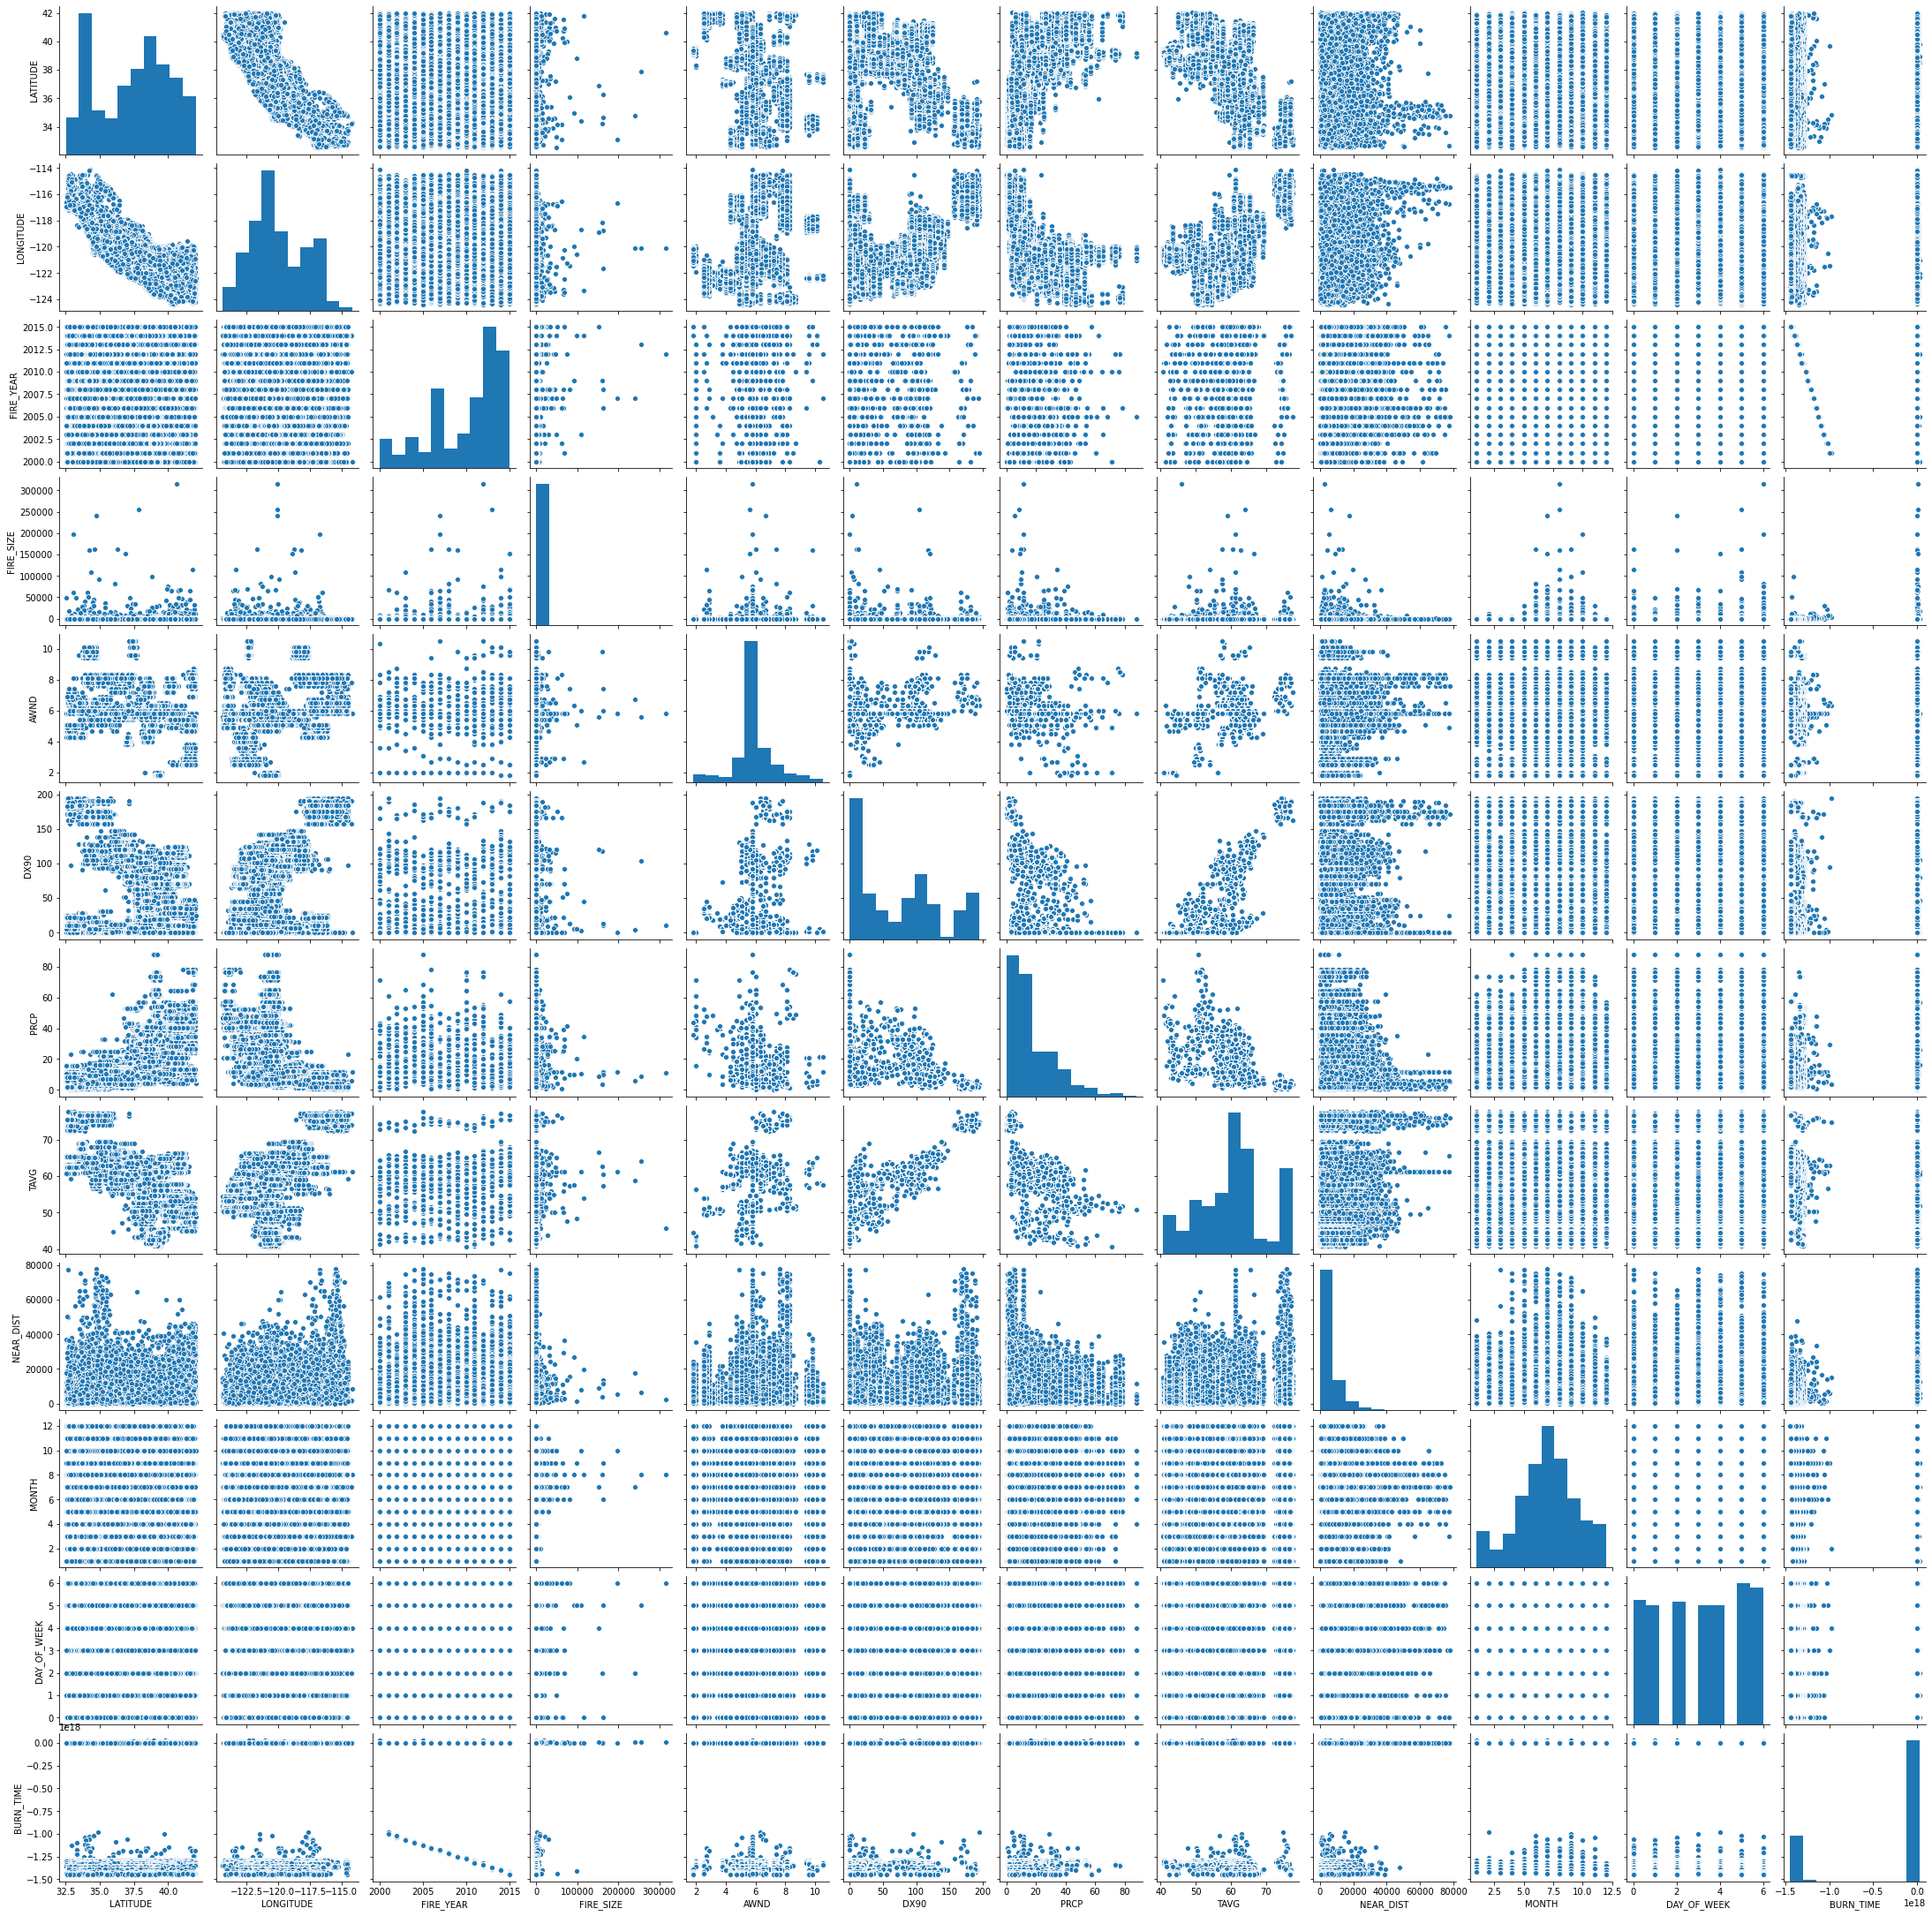

In [9]:
# all numeric features pairwise
sns.pairplot(data);

In [10]:
#data.corr()

In [11]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
enc_df = pd.DataFrame(enc.fit_transform(data[['STAT_CAUSE_DESCR']]))
enc.get_feature_names()
enc_df.columns = enc.get_feature_names()
data = data.join(enc_df)
data= data.drop('STAT_CAUSE_DESCR', axis=1)
data = data.drop('DATE', axis =1)
data.head()

,LATITUDE,LONGITUDE,FIRE_YEAR,FIRE_SIZE,AWND,DX90,PRCP,TAVG,NEAR_DIST,MONTH,...,x0_Debris Burning,x0_Equipment Use,x0_Fireworks,x0_Lightning,x0_Miscellaneous,x0_Missing/Undefined,x0_Powerline,x0_Railroad,x0_Smoking,x0_Structure
0,38.900278,-120.002500,2000,0.1,5.0,1.0,11.85,44.0,1702.002813,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38.893889,-120.032222,2000,0.1,5.0,1.0,11.85,44.0,844.446657,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.900000,-119.983333,2000,0.1,5.0,1.0,11.85,44.0,1141.746990,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.016944,-120.125000,2000,1.0,5.0,1.0,11.85,44.0,2029.504605,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,38.851389,-119.968333,2000,0.1,5.0,1.0,11.85,44.0,4435.980601,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data.corr()

,LATITUDE,LONGITUDE,FIRE_YEAR,FIRE_SIZE,AWND,DX90,PRCP,TAVG,NEAR_DIST,MONTH,...,x0_Debris Burning,x0_Equipment Use,x0_Fireworks,x0_Lightning,x0_Miscellaneous,x0_Missing/Undefined,x0_Powerline,x0_Railroad,x0_Smoking,x0_Structure
LATITUDE,1.000000,-0.871806,0.002557,0.003081,-0.404035,-0.482937,0.588021,-0.695378,0.147820,0.070720,...,0.074082,-0.096940,-0.003768,0.307590,-0.070542,-0.135104,-0.003802,0.025368,-0.058213,-0.005253
LONGITUDE,-0.871806,1.000000,-0.093018,-0.005565,0.317555,0.524529,-0.543489,0.605262,0.000229,-0.054289,...,-0.088514,0.072172,0.011427,-0.114366,0.015232,0.045883,-0.014284,-0.005400,0.045630,0.011201
FIRE_YEAR,0.002557,-0.093018,1.000000,-0.006287,0.014699,0.079904,-0.131360,0.105568,-0.073959,-0.050824,...,0.149412,-0.166480,-0.010583,-0.045905,-0.039796,0.281187,-0.085390,-0.035187,-0.017607,-0.002072
FIRE_SIZE,0.003081,-0.005565,-0.006287,1.000000,0.000603,-0.010511,-0.000401,-0.006344,0.022490,0.010175,...,-0.005915,-0.003534,-0.000696,0.027132,-0.001644,-0.008909,-0.002471,-0.000602,-0.006310,0.018212
AWND,-0.404035,0.317555,0.014699,0.000603,1.000000,0.403913,-0.359100,0.425779,-0.050891,-0.037925,...,-0.056652,0.087363,0.012352,-0.153399,0.035152,0.056054,0.001835,-0.009276,0.042312,0.014809
DX90,-0.482937,0.524529,0.079904,-0.010511,0.403913,1.000000,-0.456433,0.836543,-0.052080,-0.070148,...,-0.031431,0.036277,0.011938,-0.135272,0.009288,0.099655,-0.008139,-0.012122,0.047570,0.005654
PRCP,0.588021,-0.543489,-0.131360,-0.000401,-0.359100,-0.456433,1.000000,-0.543013,0.025649,0.056529,...,0.042074,-0.028583,-0.002177,0.107773,-0.022690,-0.116828,0.016549,0.027097,-0.029132,-0.008008
TAVG,-0.695378,0.605262,0.105568,-0.006344,0.425779,0.836543,-0.543013,1.000000,-0.112348,-0.085618,...,-0.041439,0.059293,0.010290,-0.254902,0.051391,0.150554,-0.006337,-0.022081,0.047543,0.006732
NEAR_DIST,0.147820,0.000229,-0.073959,0.022490,-0.050891,-0.052080,0.025649,-0.112348,1.000000,0.036339,...,-0.065491,-0.014753,0.008077,0.355082,-0.085103,-0.134034,-0.016478,0.013470,-0.044251,0.004271
MONTH,0.070720,-0.054289,-0.050824,0.010175,-0.037925,-0.070148,0.056529,-0.085618,0.036339,1.000000,...,-0.072339,-0.002102,-0.001047,0.073979,0.037418,-0.050018,0.005067,-0.015046,-0.011968,-0.007327


## REGRESSION

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [14]:
# focus on cross validation - since such small dataset 
X,y = data.drop(columns=['FIRE_SIZE']), data['FIRE_SIZE']
trainX, testX, trainY, testY = train_test_split(X,y, train_size=0.8, random_state=42, shuffle=True)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53128 entries, 0 to 53127
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LATITUDE              53128 non-null  float64
 1   LONGITUDE             53128 non-null  float64
 2   FIRE_YEAR             53128 non-null  int64  
 3   AWND                  53128 non-null  float64
 4   DX90                  53128 non-null  float64
 5   PRCP                  53128 non-null  float64
 6   TAVG                  53128 non-null  float64
 7   NEAR_DIST             53128 non-null  float64
 8   MONTH                 53128 non-null  int64  
 9   DAY_OF_WEEK           53128 non-null  int64  
 10  BURN_TIME             53128 non-null  int64  
 11  x0_Arson              53128 non-null  float64
 12  x0_Campfire           53128 non-null  float64
 13  x0_Children           53128 non-null  float64
 14  x0_Debris Burning     53128 non-null  float64
 15  x0_Equipment Use   

In [16]:
# scaler
scaler = StandardScaler()
scaler.fit(trainX)
trainX_scale = scaler.transform(trainX)
testX_scale = scaler.transform(testX)

In [17]:
def fit_model(model, X, y):
    model.fit(X, y)
    preds = model.predict(X)
    print('Train MAE:', mean_absolute_error(y, preds))
    print("Train MSE:", mse(y,preds))
    #cv_scores = cross_val_score(model,X,y, scoring='neg_mean_absolute_error', cv=10)
    #print('Average CV MAE:', cv_scores.mean()*-1)

## Random Forest Regression

In [18]:
data_rf = RandomForestRegressor()
fit_model(data_rf, trainX_scale, trainY)

Train MAE: 68.18013234897921
Train MSE: 1362033.7786938262


In [19]:
# Random Forest Regressor test
rfr_preds_test = data_rf.predict(testX_scale)
print('Test MAE:', mean_absolute_error(testY, rfr_preds_test))
print("Test MSE =", mse(testY,rfr_preds_test))
print("R2 Score =", r2_score(testY, rfr_preds_test))

Test MAE: 193.33092966738798
Test MSE = 8708682.61252485
R2 Score = -0.3821389057745135


## SVM

In [ ]:
# SVM - Support Vector Regressor
data_svm_lin = svm.SVR(kernel='linear')
fit_model(data_svm_lin, trainX_scale, trainY)

In [ ]:
svr_preds_test = data_svm_lin.predict(testX_scale)
print('Test MAE:', mean_absolute_error(testY, svr_preds_test))
print("Test MSE =", mse(testY,svr_preds_test))
print("R2 Score =", r2_score(testY, svr_preds_test))

## XGBoost

In [20]:
data_xgb = xgb.XGBRegressor()
fit_model(data_xgb, trainX_scale, trainY)

Train MAE: 31.85843460539149
Train MSE: 46699.51416037884


In [21]:
xgb_preds_test = data_xgb.predict(testX_scale)
print('Test MAE:', mean_absolute_error(testY, xgb_preds_test))
print("Test MSE =", mse(testY,xgb_preds_test))
print("R2 Score =", r2_score(testY, xgb_preds_test))

Test MAE: 220.9342089663038
Test MSE = 12241473.984175479
R2 Score = -0.9428216884631804
